In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
def MetersToDecimalDegrees(meters, latitude):
    return meters / (111.32 * 1000 * np.cos(latitude * (np.pi / 180)))

def DecimalDegreestoMeters(decdeg, latitude):
    return (111.32 * 1000 * np.cos(latitude * (np.pi / 180))) * decdeg

def arccos_theta(v):
    if v < 1 and v > -1:
        return np.arccos(v)
    elif v > 1 and v < 3:
        return np.arccos(2-v)
    elif v < -1 and v > -3:
        return np.arccos(-1 + 0.000001) - np.arccos(2+v)
    else:
        return np.nan

arccos_theta = np.vectorize(arccos_theta)

In [3]:
dem = xr.open_dataarray('/Users/rdcrlzh1/Documents/uavsar-coherence/data/dem/conus.tif').squeeze('band', drop = True)

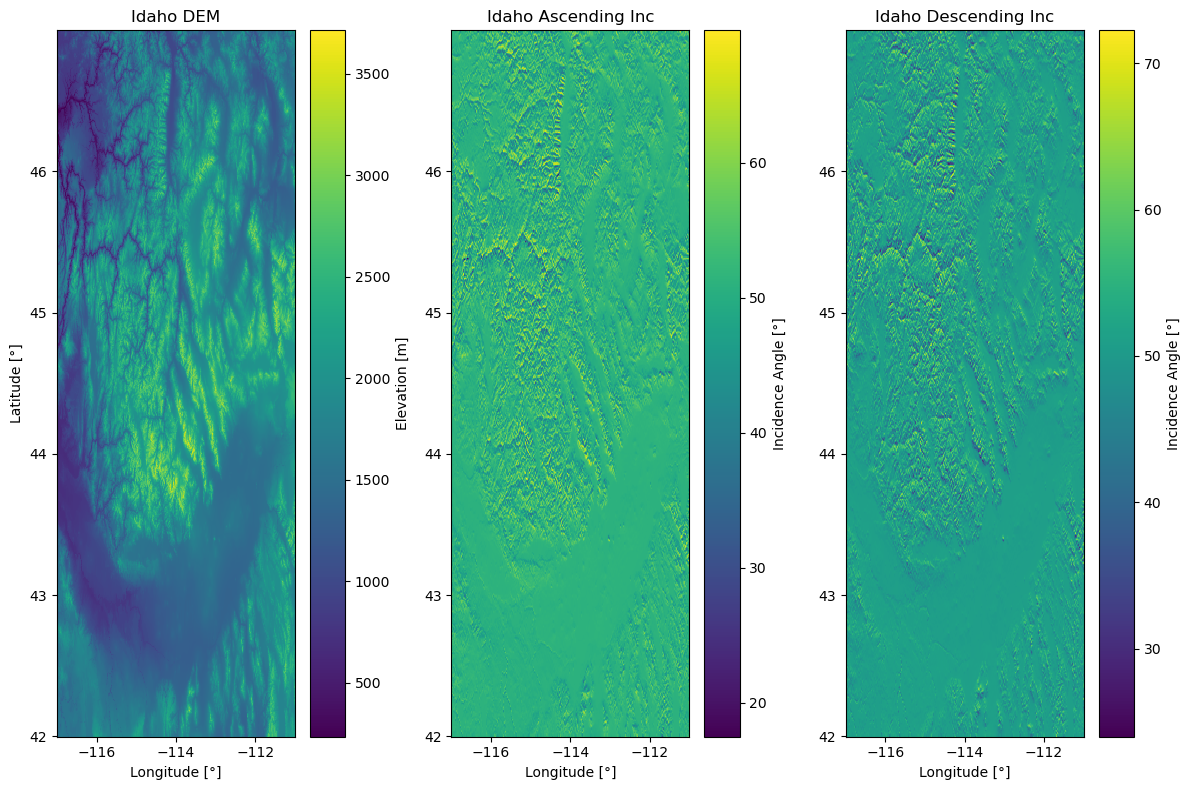

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (12, 8))
sub = dem.sel(x = slice(-117, -111), y = slice(47, 42))

res = float(sub.spatial_ref.attrs['spatial_ref'].split(',')[14])
res = DecimalDegreestoMeters(res, sub.y).mean().values

dx, dy = np.gradient(sub.values, res)
overall_inc = np.deg2rad(39)

lkv_asc = [np.cos(overall_inc), 0, np.sin(overall_inc)]
lkv_des = [-np.cos(overall_inc), 0, np.sin(overall_inc)]

sub.plot(ax = axes[0], cbar_kwargs = {'label': 'Elevation [m]'})

inc_cos =  dx * lkv_asc[0] + dy * lkv_asc[1] + lkv_asc[2]
inc = arccos_theta(inc_cos)
sub.data = np.rad2deg(inc)
sub.plot(ax = axes[1], cbar_kwargs = {'label': 'Incidence Angle [°]'})

inc_cos =  dx * lkv_des[0] + dy * lkv_des[1] + lkv_des[2]
inc = arccos_theta(inc_cos)
sub.data = np.rad2deg(inc)
sub.plot(ax = axes[2], cbar_kwargs = {'label': 'Incidence Angle [°]'})

axes[0].set_title('Idaho DEM')
axes[1].set_title('Idaho Ascending Inc')
axes[2].set_title('Idaho Descending Inc')

for ax in axes: ax.set_xlabel('Longitude [°]'); ax.set_ylabel('Latitude [°]')

for ax in axes[1:]: ax.set_ylabel('')

plt.tight_layout()

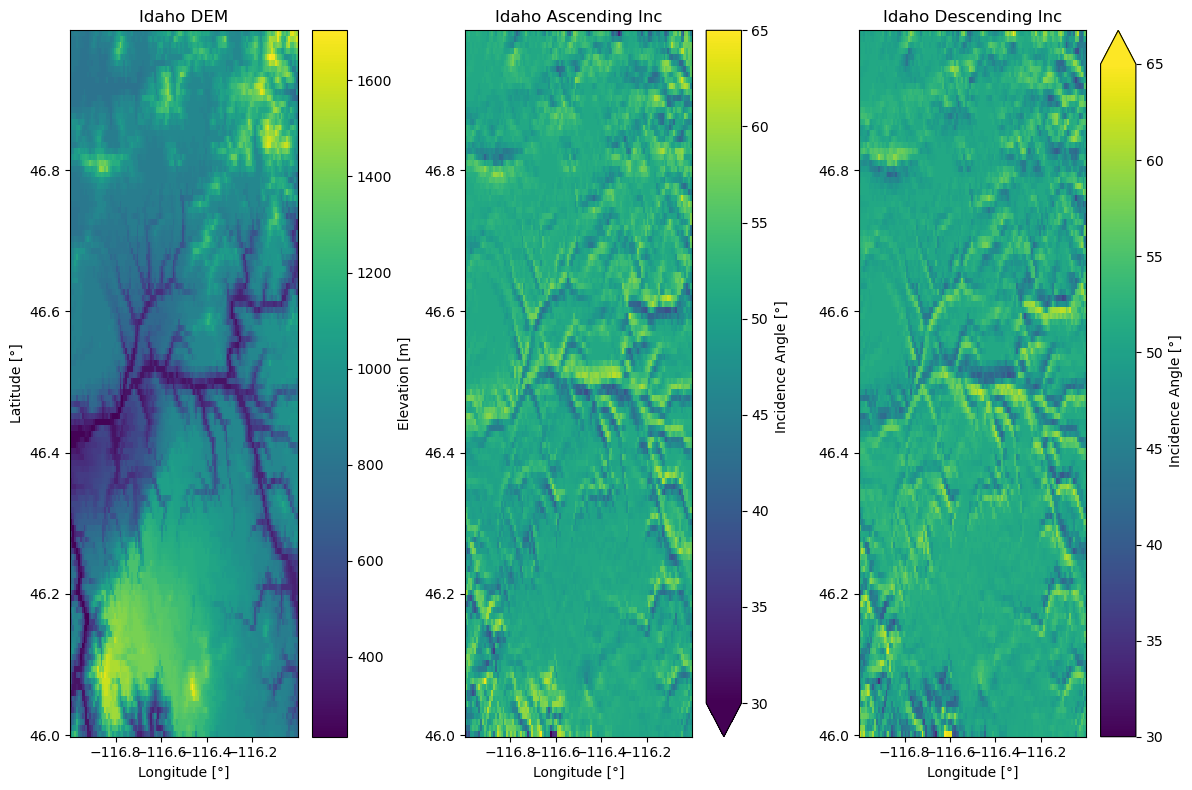

In [27]:
fig, axes = plt.subplots(1, 3, figsize = (12, 8))
sub = dem.sel(x = slice(-117, -116), y = slice(47, 46))

res = float(sub.spatial_ref.attrs['spatial_ref'].split(',')[14])
res = DecimalDegreestoMeters(res, sub.y).mean().values

dx, dy = np.gradient(sub.values, res)
overall_inc = np.deg2rad(39)

lkv_asc = [np.cos(overall_inc), 0, np.sin(overall_inc)]
lkv_des = [-np.cos(overall_inc), 0, np.sin(overall_inc)]

sub.plot(ax = axes[0], cbar_kwargs = {'label': 'Elevation [m]'})

inc_cos =  dx * lkv_asc[0] + dy * lkv_asc[1] + lkv_asc[2]
inc = arccos_theta(inc_cos)
sub.data = np.rad2deg(inc)
sub.plot(ax = axes[1], cbar_kwargs = {'label': 'Incidence Angle [°]'}, vmin = 30, vmax = 65)

inc_cos =  dx * lkv_des[0] + dy * lkv_des[1] + lkv_des[2]
inc = arccos_theta(inc_cos)
sub.data = np.rad2deg(inc)
sub.plot(ax = axes[2], cbar_kwargs = {'label': 'Incidence Angle [°]'}, vmin = 30, vmax = 65)

axes[0].set_title('Idaho DEM')
axes[1].set_title('Idaho Ascending Inc')
axes[2].set_title('Idaho Descending Inc')

for ax in axes: ax.set_xlabel('Longitude [°]'); ax.set_ylabel('Latitude [°]')

for ax in axes[1:]: ax.set_ylabel('')

plt.tight_layout()

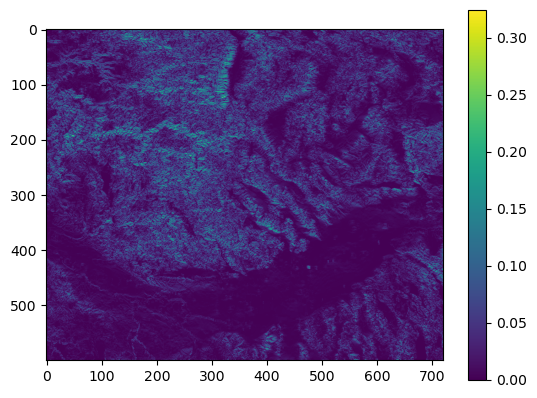

In [118]:
plt.imshow(np.abs(inc_cos))
plt.colorbar()

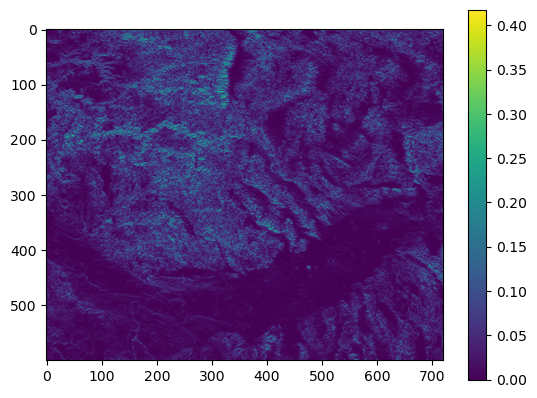

In [115]:
plt.imshow(np.abs(dx))
plt.colorbar()